# Codealong 06

In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import neighbors, metrics, grid_search, cross_validation

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

## `Iris` dataset

In [2]:
df = pd.read_csv(os.path.join('iris.csv'))

In [3]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Part A - Activity: Iris Dataset Exploratory Analysis

In [4]:
color = df.Species.map(pd.Series({'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'}))

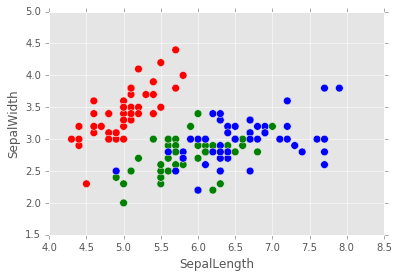

In [5]:
df.plot(kind = "scatter", x = "SepalLength", y = "SepalWidth", c = color, s = 60)

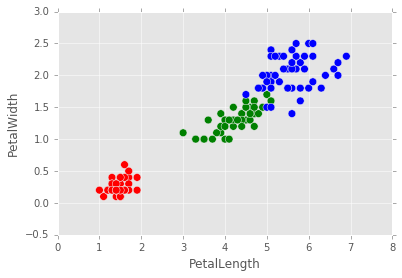

In [6]:
df.plot(kind = "scatter", x = "PetalLength", y = "PetalWidth", c = color, s = 60)

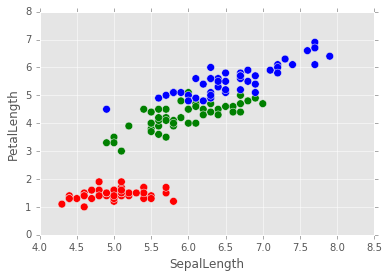

In [7]:
df.plot(kind = "scatter", x = "SepalLength", y = "PetalLength", c = color, s = 60)

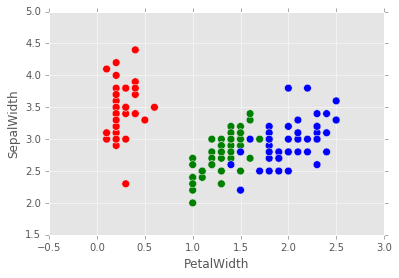

In [8]:
df.plot(kind = "scatter", x = "PetalWidth", y = "SepalWidth", c = color, s = 60)

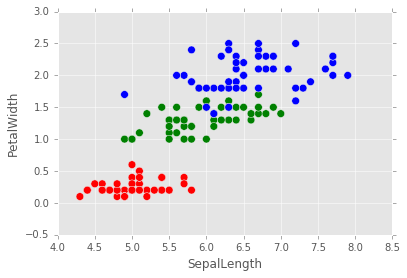

In [9]:
df.plot(kind = "scatter", x = "SepalLength", y = "PetalWidth", c = color, s = 60)

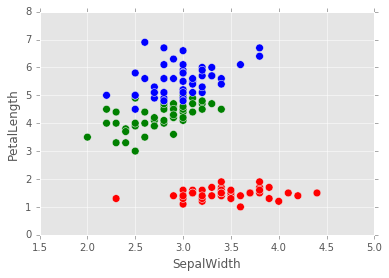

In [10]:
df.plot(kind = "scatter", x = "SepalWidth", y = "PetalLength", c = color, s = 60)

## Part B - First hand-coded classifier

In [ ]:
def my_first_classifier(row):
    if 

In [ ]:
y_hat = df.apply(my_first_classifier, axis = 1)

y_hat

In [ ]:
species_df = pd.DataFrame({'Observed': df.Species, 'Predicted': y_hat})

species_df

## Part C - Classification metrics

### Accuracy

In [19]:
1. * sum(species_df.Observed == species_df.Predicted) / len(df)

NameError: name 'species_df' is not defined

### Misclassification rate

In [ ]:
# TODO

## Part D - Activity: Second hand-coded classifier

In [11]:
def my_second_classifier(row):
    if row.PetalLength < 2:
        return 'Setosa'
    elif row.PetalLength < 5:
        return 'Versicolor'
    else:
        return 'Virginica'

In [21]:
y_hat = df.apply(my_second_classifier, axis = 1)

In [22]:
sum(y_hat != df.Species)

8

In [23]:
1. * sum(y_hat == df.Species) / len(df)

0.9466666666666667

## Part E

### Feature matrix and label vector

In [12]:
X = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
y = df['Species']

In [13]:
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: Species, dtype: object

### K-Nearest Neighbors (KNN)

In [15]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
y_hat = model.predict(X)

In [17]:
species_df = pd.DataFrame({'Observed': y, 'Predicted': y_hat})

species_df

,Observed,Predicted
0,Setosa,Setosa
1,Setosa,Setosa
2,Setosa,Setosa
3,Setosa,Setosa
4,Setosa,Setosa
...,...,...
145,Virginica,Virginica
146,Virginica,Virginica
147,Virginica,Virginica
148,Virginica,Virginica


In [18]:
species_df[species_df.Predicted != species_df.Observed]

,Observed,Predicted
70,Versicolor,Virginica
72,Versicolor,Virginica
83,Versicolor,Virginica
106,Virginica,Versicolor
119,Virginica,Versicolor


In [19]:
sum(species_df.Predicted != species_df.Observed)

5

You can measure the precision of your prediction either manually or with `.score()`

In [20]:
1. * sum(species_df.Predicted == species_df.Observed) / len(df)

0.9666666666666667

In [21]:
model.score(X, y)

0.96666666666666667

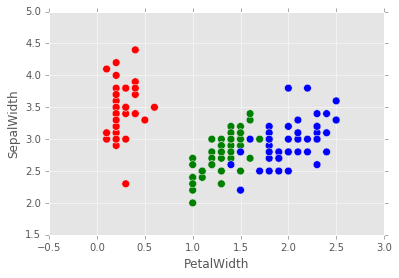

In [22]:
df.plot(kind = "scatter", x = "PetalWidth", y = "SepalWidth", c = color, s = 60)

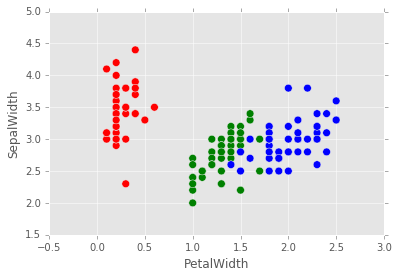

In [26]:
model_color = species_df.Predicted.map(pd.Series({'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'}))
df.plot(kind = "scatter", x = "PetalWidth", y = "SepalWidth", c = model_color, s = 60)

# weights = 'uniform'

In [27]:
neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').fit(X, y).score(X, y)

0.96666666666666667

# weights = 'distance'

In [28]:
neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'distance').fit(X, y).score(X, y)

1.0

In [29]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
model.fit(X, y)
y_hat = model.predict(X)
species_df = pd.DataFrame({'Observed': y, 'Predicted': y_hat})

species_df

,Observed,Predicted
0,Setosa,Setosa
1,Setosa,Setosa
2,Setosa,Setosa
3,Setosa,Setosa
4,Setosa,Setosa
...,...,...
145,Virginica,Virginica
146,Virginica,Virginica
147,Virginica,Virginica
148,Virginica,Virginica


In [30]:
species_df[species_df.Predicted != species_df.Observed]

,Observed,Predicted


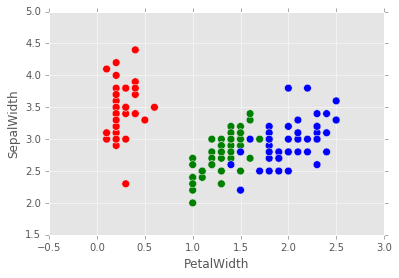

In [31]:
model_color = species_df.Predicted.map(pd.Series({'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'}))
df.plot(kind = "scatter", x = "PetalWidth", y = "SepalWidth", c = model_color, s = 60)

## Part F - What is the best value for `k`?

In [32]:
k = range(1, len(df))

score_df = pd.DataFrame({'k': k})

models = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(X, y), axis = 1)

models

score_df['Score'] = models.map(lambda model: model.score(X, y))

In [33]:
score_df

,k,Score
0,1,1.000000
1,2,0.980000
2,3,0.960000
3,4,0.960000
4,5,0.966667
...,...,...
144,145,0.600000
145,146,0.580000
146,147,0.580000
147,148,0.560000


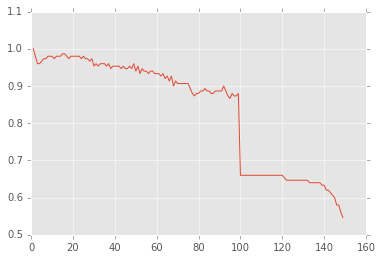

In [34]:
plt.plot(score_df.k, score_df.Score)

## Part G - Validation

60% of the dataset to train the model; the rest to test the model

In [35]:
train_df = df.sample(frac = .6, random_state = 0).sort()

C:\Users\Nicholas\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


In [36]:
train_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
...,...,...,...,...,...
141,6.9,3.1,5.1,2.3,Virginica
144,6.7,3.3,5.7,2.5,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica


In [37]:
test_df = df.drop(train_df.index)

In [38]:
test_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
9,4.9,3.1,1.5,0.1,Setosa
...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,Virginica
142,5.8,2.7,5.1,1.9,Virginica
143,6.8,3.2,5.9,2.3,Virginica
145,6.7,3.0,5.2,2.3,Virginica


The error in the training set is less than the error is the test set

In [39]:
train_X = train_df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
train_y = train_df['Species']

model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
model.fit(train_X, train_y)
print 'train = ', model.score(train_X, train_y)

test_X = test_df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
test_y = test_df['Species']

print 'test  = ', model.score(test_X, test_y)

train =  0.977777777778
test  =  0.966666666667


In [40]:
k = range(1, len(train_df))

score_df = pd.DataFrame({'k': k})

models = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(train_X, train_y), axis = 1)

score_df['TrainScore'] = models.apply(lambda model: model.score(train_X, train_y))
score_df['TestScore'] = models.apply(lambda model: model.score(test_X, test_y))

In [41]:
score_df

,k,TrainScore,TestScore
0,1,1.000000,0.966667
1,2,0.955556,0.966667
2,3,0.966667,0.966667
3,4,0.966667,0.983333
4,5,0.977778,0.966667
...,...,...,...
84,85,0.366667,0.283333
85,86,0.366667,0.283333
86,87,0.366667,0.283333
87,88,0.366667,0.283333


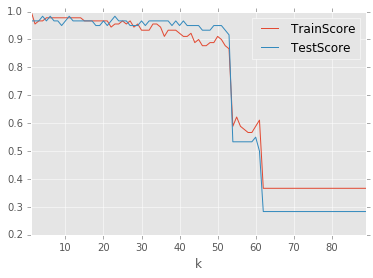

In [42]:
score_df.set_index('k').plot()

## Part H - Cross-Validation

In [43]:
len(train_df)

90

In [44]:
k_cv = 5 # 5-fold CV
k_nn = range(1, len(train_df) * (k_cv - 1) / k_cv) # k-NN

gs = grid_search.GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(),
    param_grid = {'n_neighbors': k_nn},
    cv = cross_validation.KFold(len(train_df), n_folds = k_cv)
)

gs.fit(train_X, train_y)

score_df = pd.DataFrame({'k': [score.parameters['n_neighbors'] for score in gs.grid_scores_],
    'Score': [score.mean_validation_score for score in gs.grid_scores_]})

score_df

,Score,k
0,0.900000,1
1,0.888889,2
2,0.900000,3
3,0.877778,4
4,0.877778,5
...,...,...
66,0.055556,67
67,0.055556,68
68,0.055556,69
69,0.055556,70


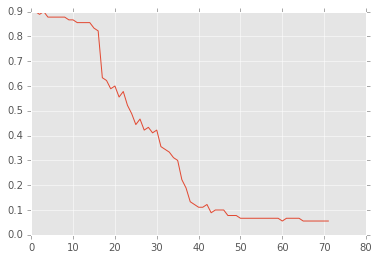

In [45]:
plt.plot(score_df.k, score_df.Score)

In [46]:
score_df[score_df.Score == score_df.Score.max()]

,Score,k
0,0.9,1
2,0.9,3


In [47]:
score_df[score_df.Score == score_df.Score.min()]

,Score,k
59,0.055556,60
64,0.055556,65
65,0.055556,66
66,0.055556,67
67,0.055556,68
68,0.055556,69
69,0.055556,70
70,0.055556,71


In [48]:
gs.score(test_X, test_y)

0.96666666666666667